In [1]:
# ============================================================================
# CELL 1: IMPORT LIBRARIES
# ============================================================================
"""
Import libraries untuk feature engineering dan preprocessing.
"""

# Data manipulation
import pandas as pd
import numpy as np
from collections import Counter

# Preprocessing & encoding
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Utilities
import warnings
import json
import os
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Plot settings
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['savefig.dpi'] = 300

print("="*80)
print("All libraries imported successfully!")
print("="*80)

All libraries imported successfully!


In [2]:
# ============================================================================
# CELL 2: LOAD RAW DATASET
# ============================================================================
"""
Load dataset yang sudah dianalisis di Notebook 01.
"""

print("\n" + "="*80)
print("LOADING DATASET")
print("="*80)

# Load data
file_path = '../data/raw/drug_consumption_raw.csv'
df = pd.read_csv(file_path)

print(f"Dataset loaded: {file_path}")
print(f"   Shape: {df.shape}")
print(f"   Samples: {len(df):,} responden")
print(f"   Features: {len(df.columns)} columns")

# Show first few rows
print("\nSample data:")
print("-"*80)
display(df.head(3))


LOADING DATASET
Dataset loaded: ../data/raw/drug_consumption_raw.csv
   Shape: (1885, 32)
   Samples: 1,885 responden
   Features: 32 columns

Sample data:
--------------------------------------------------------------------------------


,ID,age,gender,education,country,ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0


In [3]:
# ============================================================================
# CELL 3: DEFINE FEATURE GROUPS & MAPPINGS
# ============================================================================
"""
Definisikan kelompok features dan mapping values.
"""

print("\n" + "="*80)
print("DEFINING FEATURE GROUPS & MAPPINGS")
print("="*80)

# Feature groups
demographic_cols = ['age', 'gender', 'education', 'country', 'ethnicity']
personality_cols = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore']
behavioral_cols = ['Impulsive', 'SS']
legal_drugs = ['Alcohol', 'Caff', 'Choc', 'Nicotine']
illegal_drugs = ['Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Crack', 
                 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 
                 'Meth', 'Mushrooms', 'Semer']

print("\nFeature Groups:")
print(f"   • Demographics: {len(demographic_cols)} features")
print(f"   • Personality: {len(personality_cols)} features")
print(f"   • Behavioral: {len(behavioral_cols)} features")
print(f"   • Legal drugs: {len(legal_drugs)} drugs")
print(f"   • Illegal drugs: {len(illegal_drugs)} drugs")

# Demographic mappings (dari Notebook 01)
AGE_MAPPING = {
    -0.95197: '18-24',
    -0.07854: '25-34',
    0.49788: '35-44',
    1.09449: '45-54',
    1.82213: '55-64',
    2.59171: '65+'
}

GENDER_MAPPING = {
    -0.48246: 'Male',
    0.48246: 'Female'
}

EDUCATION_MAPPING = {
    -2.43591: 'Left school before 16 years',
    -1.73790: 'Left school at 16 years',
    -1.43719: 'Left school at 17 years',
    -1.22751: 'Left school at 18 years',
    -0.61113: 'Some college or university',
    -0.05921: 'Professional certificate/diploma',
    0.45468: 'University degree',
    1.16365: 'Masters degree',
    1.98437: 'Doctorate degree'
}

COUNTRY_MAPPING = {
    -0.09765: 'Australia',
    0.24923: 'Canada',
    -0.46841: 'New Zealand',
    -0.28519: 'Other',
    0.21128: 'Republic of Ireland',
    0.96082: 'UK',
    -0.57009: 'USA'
}

ETHNICITY_MAPPING = {
    -0.50212: 'Asian',
    -1.10702: 'Black',
    1.90725: 'Mixed-Black/Asian',
    0.12600: 'Mixed-White/Asian',
    -0.22166: 'Mixed-White/Black',
    0.11440: 'Other',
    -0.31685: 'White'
}

# Drug value mapping (categorical to numeric)
DRUG_VALUE_MAPPING = {
    'CL0': 0.0,   # Never Used
    'CL1': 0.13,  # Used over a Decade Ago
    'CL2': 0.35,  # Used in Last Decade
    'CL3': 0.71,  # Used in Last Year
    'CL4': 0.79,  # Used in Last Month
    'CL5': 0.92,  # Used in Last Week
    'CL6': 1.0    # Used in Last Day
}

print("\nMappings defined:")
print(f"   Age: {len(AGE_MAPPING)} categories")
print(f"   Gender: {len(GENDER_MAPPING)} categories")
print(f"   Education: {len(EDUCATION_MAPPING)} levels")
print(f"   Country: {len(COUNTRY_MAPPING)} countries")
print(f"   Ethnicity: {len(ETHNICITY_MAPPING)} groups")
print(f"   Drug values: {len(DRUG_VALUE_MAPPING)} levels")


DEFINING FEATURE GROUPS & MAPPINGS

Feature Groups:
   • Demographics: 5 features
   • Personality: 5 features
   • Behavioral: 2 features
   • Legal drugs: 4 drugs
   • Illegal drugs: 14 drugs

Mappings defined:
   Age: 6 categories
   Gender: 2 categories
   Education: 9 levels
   Country: 7 countries
   Ethnicity: 7 groups
   Drug values: 7 levels


In [4]:
# ============================================================================
# CELL 4: APPLY DEMOGRAPHIC MAPPINGS
# ============================================================================
"""
Convert demographic numeric values to categorical labels.
"""

print("\n" + "="*80)
print("APPLYING DEMOGRAPHIC MAPPINGS")
print("="*80)

# Apply mappings
df['Age_Category'] = df['age'].map(AGE_MAPPING)
df['Gender_Category'] = df['gender'].map(GENDER_MAPPING)
df['Education_Category'] = df['education'].map(EDUCATION_MAPPING)
df['Country_Category'] = df['country'].map(COUNTRY_MAPPING)
df['Ethnicity_Category'] = df['ethnicity'].map(ETHNICITY_MAPPING)

# Verify mappings
print("\nDemographic mappings applied:")
print("-"*80)

for col, mapped_col in [
    ('age', 'Age_Category'),
    ('gender', 'Gender_Category'),
    ('education', 'Education_Category'),
    ('country', 'Country_Category'),
    ('ethnicity', 'Ethnicity_Category')
]:
    null_count = df[mapped_col].isnull().sum()
    unique_count = df[mapped_col].nunique()
    
    if null_count > 0:
        print(f"{col:12s} → {mapped_col:20s}: {unique_count} categories, {null_count} NULL values!")
    else:
        print(f"{col:12s} → {mapped_col:20s}: {unique_count} categories")

# Show sample
print("\nSample mapped demographics:")
print("-"*80)
display(df[['age', 'Age_Category', 'gender', 'Gender_Category', 
            'education', 'Education_Category']].head(3))
    


APPLYING DEMOGRAPHIC MAPPINGS

Demographic mappings applied:
--------------------------------------------------------------------------------
age          → Age_Category        : 6 categories
gender       → Gender_Category     : 2 categories
education    → Education_Category  : 9 categories
country      → Country_Category    : 7 categories
ethnicity    → Ethnicity_Category  : 7 categories

Sample mapped demographics:
--------------------------------------------------------------------------------


,age,Age_Category,gender,Gender_Category,education,Education_Category
0,0.49788,35-44,0.48246,Female,-0.05921,Professional certificate/diploma
1,-0.07854,25-34,-0.48246,Male,1.98437,Doctorate degree
2,0.49788,35-44,-0.48246,Male,-0.05921,Professional certificate/diploma


In [5]:
# ============================================================================
# CELL 4: APPLY DEMOGRAPHIC MAPPINGS
# ============================================================================
"""
Convert demographic numeric values to categorical labels.
"""

print("\n" + "="*80)
print("APPLYING DEMOGRAPHIC MAPPINGS")
print("="*80)

# Apply mappings
df['Age_Category'] = df['age'].map(AGE_MAPPING)
df['Gender_Category'] = df['gender'].map(GENDER_MAPPING)
df['Education_Category'] = df['education'].map(EDUCATION_MAPPING)
df['Country_Category'] = df['country'].map(COUNTRY_MAPPING)
df['Ethnicity_Category'] = df['ethnicity'].map(ETHNICITY_MAPPING)

# Verify mappings
print("\nDemographic mappings applied:")
print("-"*80)

for col, mapped_col in [
    ('age', 'Age_Category'),
    ('gender', 'Gender_Category'),
    ('education', 'Education_Category'),
    ('country', 'Country_Category'),
    ('ethnicity', 'Ethnicity_Category')
]:
    null_count = df[mapped_col].isnull().sum()
    unique_count = df[mapped_col].nunique()
    
    if null_count > 0:
        print(f"{col:12s} → {mapped_col:20s}: {unique_count} categories, {null_count} NULL values!")
    else:
        print(f"{col:12s} → {mapped_col:20s}: {unique_count} categories")

# Show sample
print("\nSample mapped demographics:")
print("-"*80)
display(df[['age', 'Age_Category', 'gender', 'Gender_Category', 
            'education', 'Education_Category']].head(3))



APPLYING DEMOGRAPHIC MAPPINGS

Demographic mappings applied:
--------------------------------------------------------------------------------
age          → Age_Category        : 6 categories
gender       → Gender_Category     : 2 categories
education    → Education_Category  : 9 categories
country      → Country_Category    : 7 categories
ethnicity    → Ethnicity_Category  : 7 categories

Sample mapped demographics:
--------------------------------------------------------------------------------


,age,Age_Category,gender,Gender_Category,education,Education_Category
0,0.49788,35-44,0.48246,Female,-0.05921,Professional certificate/diploma
1,-0.07854,25-34,-0.48246,Male,1.98437,Doctorate degree
2,0.49788,35-44,-0.48246,Male,-0.05921,Professional certificate/diploma


In [6]:
# ============================================================================
# CELL 5: CONVERT DRUGS TO NUMERIC VALUES
# ============================================================================
"""
Convert drug categorical values (CL0-CL6) to numeric (0.0-1.0).
"""

print("\n" + "="*80)
print("CONVERTING DRUG VALUES TO NUMERIC")
print("="*80)

all_drugs = legal_drugs + illegal_drugs

# Convert all drugs to numeric
print("Converting drug values...")
for drug in all_drugs:
    numeric_col = f'{drug}_numeric'
    if numeric_col not in df.columns:
        df[numeric_col] = df[drug].map(DRUG_VALUE_MAPPING)

print(f"{len(all_drugs)} drugs converted to numeric values")

# Verify conversion
print("\nSample drug conversions:")
print("-"*80)
sample_drugs = ['Cannabis', 'Alcohol', 'Ecstasy']
for drug in sample_drugs:
    print(f"\n{drug}:")
    print(f"   Categorical: {df[drug].value_counts().head(3).to_dict()}")
    print(f"   Numeric range: [{df[f'{drug}_numeric'].min():.2f}, {df[f'{drug}_numeric'].max():.2f}]")
    print(f"   Mean: {df[f'{drug}_numeric'].mean():.3f}")


CONVERTING DRUG VALUES TO NUMERIC
Converting drug values...
18 drugs converted to numeric values

Sample drug conversions:
--------------------------------------------------------------------------------

Cannabis:
   Categorical: {'CL6': 463, 'CL0': 413, 'CL2': 266}
   Numeric range: [0.00, 1.00]
   Mean: 0.538

Alcohol:
   Categorical: {'CL5': 759, 'CL6': 505, 'CL4': 287}
   Numeric range: [0.00, 1.00]
   Mean: 0.848

Ecstasy:
   Categorical: {'CL0': 1021, 'CL3': 277, 'CL2': 234}
   Numeric range: [0.00, 1.00]
   Mean: 0.263


In [7]:
# ============================================================================
# CELL 6: BINARY TARGET CREATION (FORMAL)
# ============================================================================
"""
KRUSIAL: Create binary target variable.

Definition:
- Non-Recent Use (0): Value ≤ 0.5 (CL0, CL1, CL2)
- Recent Use (1): Value > 0.5 (CL3, CL4, CL5, CL6)

Logic:
- User (1): Minimal 1 dari 14 illegal drugs > 0.5
- Non-User (0): Semua 14 illegal drugs ≤ 0.5
"""

print("\n" + "="*80)
print("BINARY TARGET CREATION (FORMAL)")
print("="*80)

# Threshold definition
THRESHOLD = 0.5

print(f"\nBinary Classification Definition:")
print("-"*80)
print(f"Threshold: {THRESHOLD}")
print("\nNon-Recent Use (Class 0):")
print("   • CL0: Never Used (value = 0.0)")
print("   • CL1: Used over Decade Ago (value = 0.13)")
print("   • CL2: Used in Last Decade (value = 0.35)")
print(f"   • Condition: All illegal drugs ≤ {THRESHOLD}")

print("\nRecent Use (Class 1):")
print("   • CL3: Used in Last Year (value = 0.71)")
print("   • CL4: Used in Last Month (value = 0.79)")
print("   • CL5: Used in Last Week (value = 0.92)")
print("   • CL6: Used in Last Day (value = 1.0)")
print(f"   • Condition: At least 1 illegal drug > {THRESHOLD}")

# Create binary target
illegal_drugs_numeric = [f'{drug}_numeric' for drug in illegal_drugs]

# Check if any illegal drug > threshold
df['Drug_User'] = (df[illegal_drugs_numeric] > THRESHOLD).any(axis=1).astype(int)

# Distribution
target_counts = df['Drug_User'].value_counts().sort_index()
target_pct = (target_counts / len(df) * 100)

print("\n" + "="*80)
print("BINARY TARGET DISTRIBUTION")
print("="*80)

print(f"\nClass 0 (Non-User):  {target_counts[0]:4d} samples ({target_pct[0]:5.2f}%)")
print(f"Class 1 (User):      {target_counts[1]:4d} samples ({target_pct[1]:5.2f}%)")
print(f"Total:               {len(df):4d} samples (100.00%)")

# Imbalance analysis
imbalance_ratio = target_counts[0] / target_counts[1] if target_counts[1] > 0 else 0
print(f"\nImbalance Ratio: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 1.5:
    print("Moderate imbalance detected")
    print("   → Will apply SMOTE/ADASYN in Notebook 05")
elif imbalance_ratio > 2.0:
    print("Significant imbalance detected")
    print("   → SMOTE/ADASYN highly recommended")
else:
    print("Classes are relatively balanced")
    print("   → SMOTE/ADASYN optional, but still recommended for comparison")

# Verify logic
print("\nVerification:")
print("-"*80)

# Sample verification for Class 1
user_sample = df[df['Drug_User'] == 1].iloc[0]
print("Sample User (Class 1):")
for drug in illegal_drugs[:5]:  # Show first 5
    value = user_sample[f'{drug}_numeric']
    status = "✓ RECENT" if value > THRESHOLD else "✗ non-recent"
    print(f"   {drug:12s}: {value:.2f} {status}")

print("\n" + "-"*80)

# Sample verification for Class 0
nonuser_sample = df[df['Drug_User'] == 0].iloc[0]
print("Sample Non-User (Class 0):")
for drug in illegal_drugs[:5]:
    value = nonuser_sample[f'{drug}_numeric']
    status = "✓ RECENT" if value > THRESHOLD else "✗ non-recent"
    print(f"   {drug:12s}: {value:.2f} {status}")

print("\nBinary target created successfully!")


BINARY TARGET CREATION (FORMAL)

Binary Classification Definition:
--------------------------------------------------------------------------------
Threshold: 0.5

Non-Recent Use (Class 0):
   • CL0: Never Used (value = 0.0)
   • CL1: Used over Decade Ago (value = 0.13)
   • CL2: Used in Last Decade (value = 0.35)
   • Condition: All illegal drugs ≤ 0.5

Recent Use (Class 1):
   • CL3: Used in Last Year (value = 0.71)
   • CL4: Used in Last Month (value = 0.79)
   • CL5: Used in Last Week (value = 0.92)
   • CL6: Used in Last Day (value = 1.0)
   • Condition: At least 1 illegal drug > 0.5

BINARY TARGET DISTRIBUTION

Class 0 (Non-User):   710 samples (37.67%)
Class 1 (User):      1175 samples (62.33%)
Total:               1885 samples (100.00%)

Imbalance Ratio: 0.60:1
Classes are relatively balanced
   → SMOTE/ADASYN optional, but still recommended for comparison

Verification:
--------------------------------------------------------------------------------
Sample User (Class 1):
   

In [8]:
# ============================================================================
# CELL 7: FEATURE ENCODING - AGE & EDUCATION (ORDINAL)
# ============================================================================
"""
Encode Age and Education sebagai ordinal (ada urutan).
"""

print("\n" + "="*80)
print("ORDINAL ENCODING: AGE & EDUCATION")
print("="*80)

# Age ordering (youngest to oldest)
age_order = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
age_encoding = {age: idx for idx, age in enumerate(age_order)}

df['Age_Encoded'] = df['Age_Category'].map(age_encoding)

print("\nAge Encoding:")
print("-"*80)
print("Order: youngest → oldest")
for age, code in age_encoding.items():
    count = (df['Age_Category'] == age).sum()
    print(f"   {code} = {age:10s} (n={count:4d})")

# Education ordering (lowest to highest)
education_order = [
    'Left school before 16 years',
    'Left school at 16 years',
    'Left school at 17 years',
    'Left school at 18 years',
    'Some college or university',
    'Professional certificate/diploma',
    'University degree',
    'Masters degree',
    'Doctorate degree'
]
education_encoding = {edu: idx for idx, edu in enumerate(education_order)}

df['Education_Encoded'] = df['Education_Category'].map(education_encoding)

print("\nEducation Encoding:")
print("-"*80)
print("Order: lowest → highest")
for edu, code in education_encoding.items():
    count = (df['Education_Category'] == edu).sum()
    print(f"   {code} = {edu:40s} (n={count:4d})")

# Verify encoding
print("\nOrdinal encoding completed:")
print(f"   • Age: {df['Age_Encoded'].nunique()} unique values (0-{df['Age_Encoded'].max()})")
print(f"   • Education: {df['Education_Encoded'].nunique()} unique values (0-{df['Education_Encoded'].max()})")

# Check for nulls
age_nulls = df['Age_Encoded'].isnull().sum()
edu_nulls = df['Education_Encoded'].isnull().sum()

if age_nulls > 0:
    print(f"Age: {age_nulls} NULL values detected!")
if edu_nulls > 0:
    print(f"Education: {edu_nulls} NULL values detected!")


ORDINAL ENCODING: AGE & EDUCATION

Age Encoding:
--------------------------------------------------------------------------------
Order: youngest → oldest
   0 = 18-24      (n= 643)
   1 = 25-34      (n= 481)
   2 = 35-44      (n= 356)
   3 = 45-54      (n= 294)
   4 = 55-64      (n=  93)
   5 = 65+        (n=  18)

Education Encoding:
--------------------------------------------------------------------------------
Order: lowest → highest
   0 = Left school before 16 years              (n=  28)
   1 = Left school at 16 years                  (n=  99)
   2 = Left school at 17 years                  (n=  30)
   3 = Left school at 18 years                  (n= 100)
   4 = Some college or university               (n= 506)
   5 = Professional certificate/diploma         (n= 270)
   6 = University degree                        (n= 480)
   7 = Masters degree                           (n= 283)
   8 = Doctorate degree                         (n=  89)

Ordinal encoding completed:
   • Age: 6 un

In [9]:
# ============================================================================
# CELL 8: FEATURE ENCODING - GENDER (BINARY)
# ============================================================================
"""
Encode Gender sebagai binary (0/1).
"""

print("\n" + "="*80)
print("BINARY ENCODING: GENDER")
print("="*80)

# Simple binary encoding
gender_encoding = {'Male': 1, 'Female': 0}
df['Gender_Encoded'] = df['Gender_Category'].map(gender_encoding)

print("\nGender Encoding:")
print("-"*80)
for gender, code in gender_encoding.items():
    count = (df['Gender_Category'] == gender).sum()
    pct = count / len(df) * 100
    print(f"   {code} = {gender:8s} (n={count:4d}, {pct:5.2f}%)")

print(f"\nBinary encoding completed:")
print(f"   • Gender: {df['Gender_Encoded'].nunique()} unique values")
print(f"   • Distribution: {df['Gender_Encoded'].value_counts().to_dict()}")

# Verify
gender_nulls = df['Gender_Encoded'].isnull().sum()
if gender_nulls > 0:
    print(f"{gender_nulls} NULL values detected!")


BINARY ENCODING: GENDER

Gender Encoding:
--------------------------------------------------------------------------------
   1 = Male     (n= 943, 50.03%)
   0 = Female   (n= 942, 49.97%)

Binary encoding completed:
   • Gender: 2 unique values
   • Distribution: {1: 943, 0: 942}


In [10]:
# ============================================================================
# CELL 9: FEATURE ENCODING - COUNTRY & ETHNICITY (ONE-HOT)
# ============================================================================
"""
One-hot encoding untuk Country and Ethnicity (nominal, tidak ada urutan).
"""

print("\n" + "="*80)
print("[] ONE-HOT ENCODING: COUNTRY & ETHNICITY")
print("="*80)

# One-hot encoding dengan prefix yang benar
df_encoded = pd.get_dummies(df, 
    columns=['Country_Category', 'Ethnicity_Category'],
    prefix=['country', 'ethnicity'])  # prefix tanpa 'Category'

print("\n1 Country One-Hot Encoding:")
print("-"*80)
country_cols = [col for col in df_encoded.columns if col.startswith('country_')]
print(f"  • Original categories: {df['Country_Category'].nunique()}")
print(f"  • One-hot columns created: {len(country_cols)}")
print(f"  • Columns: {country_cols}")

print("\n2 Ethnicity One-Hot Encoding:")
print("-"*80)
ethnicity_cols = [col for col in df_encoded.columns if col.startswith('ethnicity_')]
print(f"  • Original categories: {df['Ethnicity_Category'].nunique()}")
print(f"  • One-hot columns created: {len(ethnicity_cols)}")
print(f"  • Columns: {ethnicity_cols}")

print(f"\n[] One-hot encoding completed:")
print(f"  • Total new columns: {len(country_cols) + len(ethnicity_cols)}")
print(f"  • Dataset shape: {df.shape} → {df_encoded.shape}")

# Update dataframe
df = df_encoded.copy()


[] ONE-HOT ENCODING: COUNTRY & ETHNICITY

1 Country One-Hot Encoding:
--------------------------------------------------------------------------------
  • Original categories: 7
  • One-hot columns created: 7
  • Columns: ['country_Australia', 'country_Canada', 'country_New Zealand', 'country_Other', 'country_Republic of Ireland', 'country_UK', 'country_USA']

2 Ethnicity One-Hot Encoding:
--------------------------------------------------------------------------------
  • Original categories: 7
  • One-hot columns created: 7
  • Columns: ['ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Mixed-Black/Asian', 'ethnicity_Mixed-White/Asian', 'ethnicity_Mixed-White/Black', 'ethnicity_Other', 'ethnicity_White']

[] One-hot encoding completed:
  • Total new columns: 14
  • Dataset shape: (1885, 59) → (1885, 71)


In [11]:
# ============================================================================
# CELL 10: SELECT FINAL FEATURES FOR MODELING (FIXED)
# ============================================================================

print("\n" + "="*80)
print("[] SELECTING FINAL FEATURES")
print("="*80)

# Feature groups untuk modeling - GUNAKAN df_encoded BUKAN df
demographic_features_encoded = ['Age_Encoded', 'Gender_Encoded', 'Education_Encoded']
country_features = [col for col in df_encoded.columns if col.startswith('country_')]  # FIX: df_encoded.columns
ethnicity_features = [col for col in df_encoded.columns if col.startswith('ethnicity_')]  # FIX: df_encoded.columns
personality_features = personality_cols
behavioral_features = behavioral_cols

# Combine all features
feature_columns = (
    demographic_features_encoded +
    country_features +
    ethnicity_features +
    personality_features +
    behavioral_features
)

# Target
target_column = 'Drug_User'

print("\n[] Feature Selection:")
print("-"*80)
print(f"1. Demographics (encoded): {len(demographic_features_encoded)} features")
print(f"   {demographic_features_encoded}")
print(f"\n2. Country (one-hot): {len(country_features)} features")
print(f"   {country_features}")
print(f"\n3. Ethnicity (one-hot): {len(ethnicity_features)} features") 
print(f"   {ethnicity_features}")
print(f"\n4. Personality (NEO-FFI-R): {len(personality_features)} features")
print(f"   {personality_features}")
print(f"\n5. Behavioral (BIS-11, ImpSS): {len(behavioral_features)} features")
print(f"   {behavioral_features}")

print("\n" + "="*80)
print(f"[] TOTAL INPUT FEATURES: {len(feature_columns)}")
print(f"[] TARGET VARIABLE: {target_column}")
print("="*80)

# Create X and y - GUNAKAN df_encoded BUKAN df
X = df_encoded[feature_columns].copy()  # FIX: df_encoded
y = df_encoded[target_column].copy()    # FIX: df_encoded

print(f"\n[] Feature matrix created:")
print(f" * X shape: {X.shape}")
print(f" * y shape: {y.shape}")
print(f" * X dtypes: {X.dtypes.value_counts().to_dict()}")


[] SELECTING FINAL FEATURES

[] Feature Selection:
--------------------------------------------------------------------------------
1. Demographics (encoded): 3 features
   ['Age_Encoded', 'Gender_Encoded', 'Education_Encoded']

2. Country (one-hot): 7 features
   ['country_Australia', 'country_Canada', 'country_New Zealand', 'country_Other', 'country_Republic of Ireland', 'country_UK', 'country_USA']

3. Ethnicity (one-hot): 7 features
   ['ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Mixed-Black/Asian', 'ethnicity_Mixed-White/Asian', 'ethnicity_Mixed-White/Black', 'ethnicity_Other', 'ethnicity_White']

4. Personality (NEO-FFI-R): 5 features
   ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore']

5. Behavioral (BIS-11, ImpSS): 2 features
   ['Impulsive', 'SS']

[] TOTAL INPUT FEATURES: 24
[] TARGET VARIABLE: Drug_User

[] Feature matrix created:
 * X shape: (1885, 24)
 * y shape: (1885,)
 * X dtypes: {dtype('bool'): 14, dtype('float64'): 7, dtype('int64'): 3}



TRAIN-TEST SPLIT (STRATIFIED)

Split Configuration:
--------------------------------------------------------------------------------
   • Test size: 20.0%
   • Random state: 42
   • Stratified: Yes (by target variable)

Dataset Splits:
--------------------------------------------------------------------------------
   • Training set:   1508 samples (80.00%)
   • Test set:        377 samples (20.00%)
   • Total:          1885 samples (100.00%)

Class Distribution Verification:
--------------------------------------------------------------------------------
Split              Class 0    Class 1      Ratio
--------------------------------------------------------------------------------
Original            37.67%     62.33%      0.60:1
Training            37.67%     62.33%      0.60:1
Test                37.67%     62.33%      0.60:1

Stratification successful:
   • Class proportions maintained across splits
   • Ready for modeling!


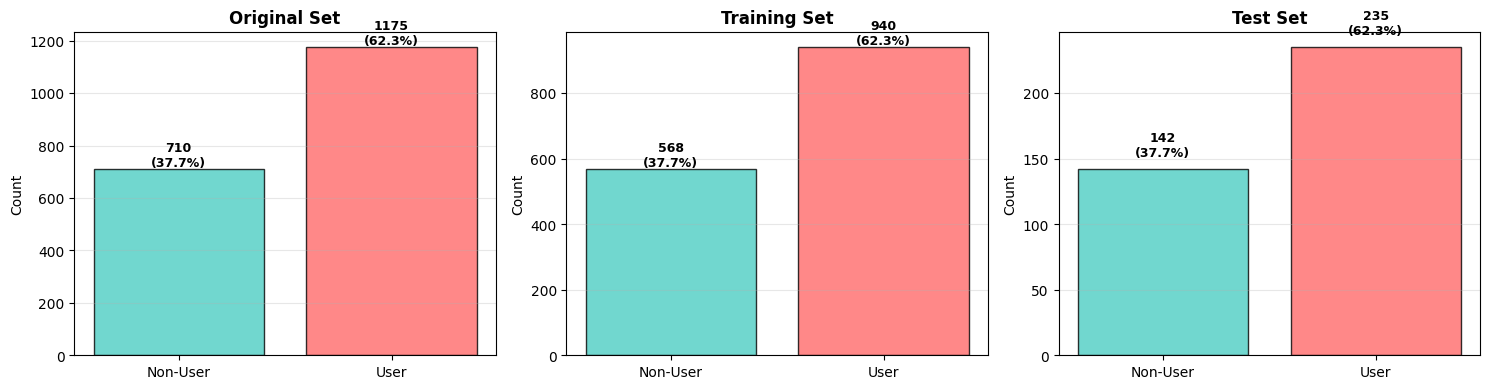

In [12]:
# ============================================================================
# CELL 11: TRAIN-TEST SPLIT (STRATIFIED)
# ============================================================================
"""
Split data 80:20 dengan stratified sampling untuk maintain class proportion.
"""

print("\n" + "="*80)
print("TRAIN-TEST SPLIT (STRATIFIED)")
print("="*80)

# Stratified split
RANDOM_STATE = 42
TEST_SIZE = 0.2

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y  # Maintain class proportion
)

print(f"\nSplit Configuration:")
print("-"*80)
print(f"   • Test size: {TEST_SIZE * 100}%")
print(f"   • Random state: {RANDOM_STATE}")
print(f"   • Stratified: Yes (by target variable)")

print(f"\nDataset Splits:")
print("-"*80)
print(f"   • Training set:   {X_train.shape[0]:4d} samples ({X_train.shape[0]/len(X)*100:5.2f}%)")
print(f"   • Test set:       {X_test.shape[0]:4d} samples ({X_test.shape[0]/len(X)*100:5.2f}%)")
print(f"   • Total:          {len(X):4d} samples (100.00%)")

# Verify stratification
train_dist = y_train.value_counts().sort_index()
test_dist = y_test.value_counts().sort_index()
original_dist = y.value_counts().sort_index()

print(f"\nClass Distribution Verification:")
print("-"*80)
print(f"{'Split':<15s} {'Class 0':>10s} {'Class 1':>10s} {'Ratio':>10s}")
print("-"*80)

for name, dist in [('Original', original_dist), ('Training', train_dist), ('Test', test_dist)]:
    class0_pct = dist[0] / dist.sum() * 100
    class1_pct = dist[1] / dist.sum() * 100
    ratio = dist[0] / dist[1]
    print(f"{name:<15s} {class0_pct:9.2f}% {class1_pct:9.2f}% {ratio:9.2f}:1")

print("\nStratification successful:")
print("   • Class proportions maintained across splits")
print("   • Ready for modeling!")

# Visual verification
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, (split_name, split_y) in enumerate([('Original', y), ('Training', y_train), ('Test', y_test)]):
    ax = axes[idx]
    counts = split_y.value_counts().sort_index()
    
    ax.bar(['Non-User', 'User'], counts, color=['#4ECDC4', '#FF6B6B'], 
           edgecolor='black', alpha=0.8)
    ax.set_title(f'{split_name} Set', fontsize=12, fontweight='bold')
    ax.set_ylabel('Count', fontsize=10)
    ax.grid(axis='y', alpha=0.3)
    
    # Add percentages
    for i, (count, pct) in enumerate(zip(counts, counts / counts.sum() * 100)):
        ax.text(i, count + 10, f'{count}\n({pct:.1f}%)', 
                ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('../results/figures/15_train_test_split_distribution.png', 
            dpi=300, bbox_inches='tight')
plt.show()

In [13]:
# ============================================================================
# CELL 12: FEATURE STATISTICS SUMMARY
# ============================================================================
"""
Generate comprehensive statistics untuk dokumentasi.
"""

print("\n" + "="*80)
print("FEATURE STATISTICS SUMMARY")
print("="*80)

# Training set statistics
print("\n1️⃣ Training Set Statistics:")
print("-"*80)

# Numeric features statistics
numeric_features = demographic_features_encoded + personality_features + behavioral_features
X_train_numeric = X_train[numeric_features]

print("\nNumeric Features (Demographics + Personality + Behavioral):")
stats_df = X_train_numeric.describe().T
stats_df['missing'] = X_train_numeric.isnull().sum()
display(stats_df.round(3))

# Binary/One-hot features
categorical_features = country_features + ethnicity_features
print(f"\nCategorical Features (One-Hot Encoded):")
print(f"   • Country features: {len(country_features)}")
print(f"   • Ethnicity features: {len(ethnicity_features)}")
print(f"   • All binary (0 or 1)")

# Feature correlation check
print("\nFeature Correlation Analysis:")
print("-"*80)

# High correlation check (potential multicollinearity)
corr_matrix = X_train_numeric.corr()
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:  # Threshold for high correlation
            high_corr_pairs.append({
                'Feature_1': corr_matrix.columns[i],
                'Feature_2': corr_matrix.columns[j],
                'Correlation': corr_val
            })

if high_corr_pairs:
    print(f"\nHigh Correlations Detected (|r| > 0.7):")
    high_corr_df = pd.DataFrame(high_corr_pairs)
    display(high_corr_df)
    print("\n   → Consider feature selection or regularization")
else:
    print("\nNo high correlations detected (all |r| ≤ 0.7)")
    print("   → Features are relatively independent")

# Target correlation
print("\nTarget Correlation Analysis:")
print("-"*80)

# Compute correlation with target
target_corr = X_train_numeric.corrwith(y_train).sort_values(key=abs, ascending=False)
print("\nTop 10 features correlated with target:")
display(target_corr.head(10).round(3))

print("\nBottom 5 features (least correlated with target):")
display(target_corr.tail(5).round(3))


FEATURE STATISTICS SUMMARY

1️⃣ Training Set Statistics:
--------------------------------------------------------------------------------

Numeric Features (Demographics + Personality + Behavioral):


,count,mean,std,min,25%,50%,75%,max,missing
Age_Encoded,1508.0,1.342,1.269,0.000,0.000,1.000,2.000,5.000,0
Gender_Encoded,1508.0,0.505,0.500,0.000,0.000,1.000,1.000,1.000,0
Education_Encoded,1508.0,4.995,1.787,0.000,4.000,5.000,6.000,8.000,0
Nscore,1508.0,-0.011,1.014,-3.157,-0.678,0.043,0.630,3.274,0
Escore,1508.0,0.002,0.984,-3.274,-0.695,0.003,0.638,3.274,0
Oscore,1508.0,0.010,0.989,-3.274,-0.717,-0.019,0.723,2.902,0
Ascore,1508.0,0.004,0.989,-3.464,-0.606,-0.017,0.590,3.157,0
Cscore,1508.0,-0.012,1.004,-3.464,-0.653,-0.007,0.758,3.464,0
Impulsive,1508.0,0.007,0.952,-2.555,-0.711,-0.217,0.530,2.902,0
SS,1508.0,-0.000,0.954,-2.078,-0.526,0.080,0.765,1.922,0



Categorical Features (One-Hot Encoded):
   • Country features: 7
   • Ethnicity features: 7
   • All binary (0 or 1)

Feature Correlation Analysis:
--------------------------------------------------------------------------------

No high correlations detected (all |r| ≤ 0.7)
   → Features are relatively independent

Target Correlation Analysis:
--------------------------------------------------------------------------------

Top 10 features correlated with target:


SS                   0.420
Age_Encoded         -0.400
Oscore               0.370
Impulsive            0.308
Cscore              -0.306
Gender_Encoded       0.274
Education_Encoded   -0.221
Ascore              -0.188
Nscore               0.172
Escore              -0.068
dtype: float64


Bottom 5 features (least correlated with target):


Gender_Encoded       0.274
Education_Encoded   -0.221
Ascore              -0.188
Nscore               0.172
Escore              -0.068
dtype: float64

In [14]:
# ============================================================================
# CELL 13: SAVE PROCESSED DATASETS
# ============================================================================
"""
Save train-test splits dan metadata untuk fase selanjutnya.
"""

print("\n" + "="*80)
print("SAVING PROCESSED DATASETS")
print("="*80)

import os
import json
import pandas as pd
from sklearn.model_selection import train_test_split

# Create directories
os.makedirs('../data/processed', exist_ok=True)
os.makedirs('../results/reports', exist_ok=True)

# Check if train-test splits exist, if not create them
try:
    if 'X_train' not in locals() or 'X_test' not in locals():
        raise NameError("Train-test splits not found")
    
    print("\nSaving train-test splits...")
    X_train.to_csv('../data/processed/X_train.csv', index=False)
    X_test.to_csv('../data/processed/X_test.csv', index=False)
    y_train.to_csv('../data/processed/y_train.csv', index=False, header=True)
    y_test.to_csv('../data/processed/y_test.csv', index=False, header=True)

    print("Datasets saved:")
    print(f"   • X_train.csv: {X_train.shape}")
    print(f"   • X_test.csv: {X_test.shape}")
    print(f"   • y_train.csv: {y_train.shape}")
    print(f"   • y_test.csv: {y_test.shape}")
    
except NameError:
    print("Train-test splits not found. Please run data splitting first.")
    print("   Skipping train-test split saving...")

# Save full processed dataset (if df exists)
try:
    print("\nSaving full processed dataset...")
    df_processed = df[feature_columns + [target_column]].copy()
    df_processed.to_csv('../data/processed/drug_consumption_processed.csv', index=False)
    print(f"Full processed dataset saved: {df_processed.shape}")
except NameError as e:
    print(f"Error saving full dataset: {e}")
    print("   Skipping full dataset saving...")

# Save feature metadata dengan error handling
print("\nSaving feature metadata...")

# Initialize default values for potentially missing variables
default_variables = {
    'RANDOM_STATE': 42,
    'THRESHOLD': 0.5,
    'original_dist': [0, 0],
    'train_dist': [0, 0], 
    'test_dist': [0, 0],
    'demographic_features_encoded': [],
    'country_features': [],
    'ethnicity_features': [],
    'personality_features': [],
    'behavioral_features': [],
    'feature_columns': [],
    'target_column': 'target',
    'age_encoding': {},
    'gender_encoding': {},
    'education_encoding': {},
    'DRUG_VALUE_MAPPING': {}
}

# Assign default values for missing variables
for var_name, default_value in default_variables.items():
    if var_name not in locals() and var_name not in globals():
        globals()[var_name] = default_value
        print(f"Set default value for {var_name}")

# Calculate distributions if they don't exist
try:
    if 'X_train' in locals() and 'y_train' in locals():
        train_dist = [len(y_train) - y_train.sum(), y_train.sum()]
    if 'X_test' in locals() and 'y_test' in locals():
        test_dist = [len(y_test) - y_test.sum(), y_test.sum()]
except:
    pass

feature_metadata = {
    'dataset_info': {
        'total_samples': len(df) if 'df' in locals() else 0,
        'train_samples': len(X_train) if 'X_train' in locals() else 0,
        'test_samples': len(X_test) if 'X_test' in locals() else 0,
        'train_percentage': len(X_train) / len(df) * 100 if 'X_train' in locals() and 'df' in locals() and len(df) > 0 else 0,
        'test_percentage': len(X_test) / len(df) * 100 if 'X_test' in locals() and 'df' in locals() and len(df) > 0 else 0,
        'random_state': RANDOM_STATE,
        'stratified': True
    },
    'features': {
        'total_features': len(feature_columns),
        'demographic_encoded': demographic_features_encoded,
        'country_onehot': country_features,
        'ethnicity_onehot': ethnicity_features,
        'personality': personality_features,
        'behavioral': behavioral_features,
        'all_features': feature_columns
    },
    'target': {
        'name': target_column,
        'threshold': THRESHOLD,
        'definition': {
            'class_0': 'Non-Recent Use (all illegal drugs ≤ 0.5)',
            'class_1': 'Recent Use (at least 1 illegal drug > 0.5)'
        },
        'distribution': {
            'original': {
                'class_0': int(original_dist[0]),
                'class_1': int(original_dist[1]),
                'class_0_pct': float(original_dist[0] / sum(original_dist) * 100) if sum(original_dist) > 0 else 0,
                'class_1_pct': float(original_dist[1] / sum(original_dist) * 100) if sum(original_dist) > 0 else 0
            },
            'train': {
                'class_0': int(train_dist[0]),
                'class_1': int(train_dist[1]),
                'class_0_pct': float(train_dist[0] / sum(train_dist) * 100) if sum(train_dist) > 0 else 0,
                'class_1_pct': float(train_dist[1] / sum(train_dist) * 100) if sum(train_dist) > 0 else 0
            },
            'test': {
                'class_0': int(test_dist[0]),
                'class_1': int(test_dist[1]),
                'class_0_pct': float(test_dist[0] / sum(test_dist) * 100) if sum(test_dist) > 0 else 0,
                'class_1_pct': float(test_dist[1] / sum(test_dist) * 100) if sum(test_dist) > 0 else 0
            }
        }
    },
    'encodings': {
        'age': age_encoding,
        'gender': gender_encoding,
        'education': education_encoding,
        'drug_values': DRUG_VALUE_MAPPING
    }
}

# Save metadata
try:
    metadata_path = '../results/reports/02_feature_metadata.json'
    with open(metadata_path, 'w') as f:
        json.dump(feature_metadata, f, indent=4)
    print(f"Feature metadata saved: {metadata_path}")
except Exception as e:
    print(f"Error saving metadata: {e}")

# Save feature statistics dengan error handling
print("\nSaving feature statistics...")

feature_stats = {}
try:
    if 'X_train_numeric' in locals():
        feature_stats['numeric_features'] = X_train_numeric.describe().to_dict()
    else:
        feature_stats['numeric_features'] = {}
        
    if 'target_corr' in locals():
        feature_stats['target_correlation'] = target_corr.to_dict()
    else:
        feature_stats['target_correlation'] = {}
        
    if 'high_corr_pairs' in locals():
        feature_stats['high_correlations'] = high_corr_pairs if high_corr_pairs else []
    else:
        feature_stats['high_correlations'] = []
        
    stats_path = '../results/reports/02_feature_statistics.json'
    with open(stats_path, 'w') as f:
        json.dump(feature_stats, f, indent=4)
    print(f"Feature statistics saved: {stats_path}")
except Exception as e:
    print(f"Error saving feature statistics: {e}")

print("\n" + "="*80)
print("SAVE PROCESS COMPLETED!")
print("="*80)
print("\nSaved files:")
print("      data/processed/")
print("      ├── X_train.csv")
print("      ├── X_test.csv") 
print("      ├── y_train.csv")
print("      ├── y_test.csv")
print("      └── drug_consumption_processed.csv")
print("\n    results/reports/")
print("      ├── 02_feature_metadata.json")
print("      └── 02_feature_statistics.json")


SAVING PROCESSED DATASETS

Saving train-test splits...
Datasets saved:
   • X_train.csv: (1508, 24)
   • X_test.csv: (377, 24)
   • y_train.csv: (1508,)
   • y_test.csv: (377,)

Saving full processed dataset...
Full processed dataset saved: (1885, 25)

Saving feature metadata...
Feature metadata saved: ../results/reports/02_feature_metadata.json

Saving feature statistics...
Feature statistics saved: ../results/reports/02_feature_statistics.json

SAVE PROCESS COMPLETED!

Saved files:
      data/processed/
      ├── X_train.csv
      ├── X_test.csv
      ├── y_train.csv
      ├── y_test.csv
      └── drug_consumption_processed.csv

    results/reports/
      ├── 02_feature_metadata.json
      └── 02_feature_statistics.json


In [15]:
# VERIFIKASI sebelum save
print(f"\nPre-save verification:")
print(f"   X_train columns: {X_train.columns.tolist()}")
print(f"   X_train shape: {X_train.shape}")
print(f"   Expected: 24 features (3 demo + 7 country + 7 ethnicity + 5 personality + 2 behavioral)")

# Jika shape salah, fix dengan:
if X_train.shape[1] != 24:
    print(f"\nWARNING: Expected 24 features, got {X_train.shape[1]}!")
    print("   Recreating feature matrix...")
    
    X = df[feature_columns].copy()
    y = df[target_column].copy()
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    print(f"Fixed! New X_train shape: {X_train.shape}")


Pre-save verification:
   X_train columns: ['Age_Encoded', 'Gender_Encoded', 'Education_Encoded', 'country_Australia', 'country_Canada', 'country_New Zealand', 'country_Other', 'country_Republic of Ireland', 'country_UK', 'country_USA', 'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Mixed-Black/Asian', 'ethnicity_Mixed-White/Asian', 'ethnicity_Mixed-White/Black', 'ethnicity_Other', 'ethnicity_White', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
   X_train shape: (1508, 24)
   Expected: 24 features (3 demo + 7 country + 7 ethnicity + 5 personality + 2 behavioral)


In [16]:
# Load dan cek
X_train_loaded = pd.read_csv('../data/processed/X_train.csv')
print(f"X_train shape: {X_train_loaded.shape}")
print(f"Columns ({len(X_train_loaded.columns)}): {X_train_loaded.columns.tolist()}")

X_train shape: (1508, 24)
Columns (24): ['Age_Encoded', 'Gender_Encoded', 'Education_Encoded', 'country_Australia', 'country_Canada', 'country_New Zealand', 'country_Other', 'country_Republic of Ireland', 'country_UK', 'country_USA', 'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Mixed-Black/Asian', 'ethnicity_Mixed-White/Asian', 'ethnicity_Mixed-White/Black', 'ethnicity_Other', 'ethnicity_White', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']


In [17]:
# ============================================================================
# CELL 14: FEATURE ENGINEERING SUMMARY REPORT
# ============================================================================
"""
Generate comprehensive summary report untuk dokumentasi.
"""

print("\n" + "="*80)
print("FEATURE ENGINEERING SUMMARY REPORT")
print("="*80)

print("\n" + "="*80)
print("DATA PREPROCESSING SUMMARY")
print("="*80)

print("\nSteps Completed:")
print("   1. Demographic mapping (numeric → categorical)")
print("   2. Drug value conversion (CL0-CL6 → 0.0-1.0)")
print("   3. Binary target creation (threshold = 0.5)")
print("   4. Ordinal encoding (Age, Education)")
print("   5. Binary encoding (Gender)")
print("   6. One-hot encoding (Country, Ethnicity)")
print("   7. Train-test split (80:20, stratified)")

print("\n" + "="*80)
print("FEATURE SUMMARY")
print("="*80)

feature_summary = {
    'Demographics (Encoded)': len(demographic_features_encoded),
    'Country (One-Hot)': len(country_features),
    'Ethnicity (One-Hot)': len(ethnicity_features),
    'Personality Traits': len(personality_features),
    'Behavioral Measures': len(behavioral_features)
}

print("\nFeature Breakdown:")
for category, count in feature_summary.items():
    print(f"   • {category:30s}: {count:2d} features")

print(f"\n   {'='*40}")
print(f"   • {'TOTAL INPUT FEATURES':30s}: {len(feature_columns):2d} features")
print(f"   {'='*40}")

print("\n" + "="*80)
print("TARGET VARIABLE SUMMARY")
print("="*80)

print(f"\nTarget: {target_column}")
print(f"Type: Binary Classification")
print(f"Threshold: {THRESHOLD}")
print(f"\nClass Definition:")
print(f"   • Class 0 (Non-User): All 14 illegal drugs ≤ {THRESHOLD}")
print(f"   • Class 1 (User): At least 1 illegal drug > {THRESHOLD}")

print(f"\nClass Distribution:")
# PERBAIKAN: Gunakan sum() dari list biasa, bukan .sum() dari pandas
train_total = train_dist[0] + train_dist[1]
test_total = test_dist[0] + test_dist[1]

# PERBAIKAN: Jangan pecah f-string menjadi multiple lines
print(f"   • Training:   {train_dist[0]:4d} Non-Users ({train_dist[0]/train_total*100:5.2f}%)  |  {train_dist[1]:4d} Users ({train_dist[1]/train_total*100:5.2f}%)")
print(f"   • Test:       {test_dist[0]:4d} Non-Users ({test_dist[0]/test_total*100:5.2f}%)  |  {test_dist[1]:4d} Users ({test_dist[1]/test_total*100:5.2f}%)")


FEATURE ENGINEERING SUMMARY REPORT

DATA PREPROCESSING SUMMARY

Steps Completed:
   1. Demographic mapping (numeric → categorical)
   2. Drug value conversion (CL0-CL6 → 0.0-1.0)
   3. Binary target creation (threshold = 0.5)
   4. Ordinal encoding (Age, Education)
   5. Binary encoding (Gender)
   6. One-hot encoding (Country, Ethnicity)
   7. Train-test split (80:20, stratified)

FEATURE SUMMARY

Feature Breakdown:
   • Demographics (Encoded)        :  3 features
   • Country (One-Hot)             :  7 features
   • Ethnicity (One-Hot)           :  7 features
   • Personality Traits            :  5 features
   • Behavioral Measures           :  2 features

   • TOTAL INPUT FEATURES          : 24 features

TARGET VARIABLE SUMMARY

Target: Drug_User
Type: Binary Classification
Threshold: 0.5

Class Definition:
   • Class 0 (Non-User): All 14 illegal drugs ≤ 0.5
   • Class 1 (User): At least 1 illegal drug > 0.5

Class Distribution:
   • Training:    568 Non-Users (37.67%)  |   940 Use


VISUALIZING FEATURE DISTRIBUTIONS


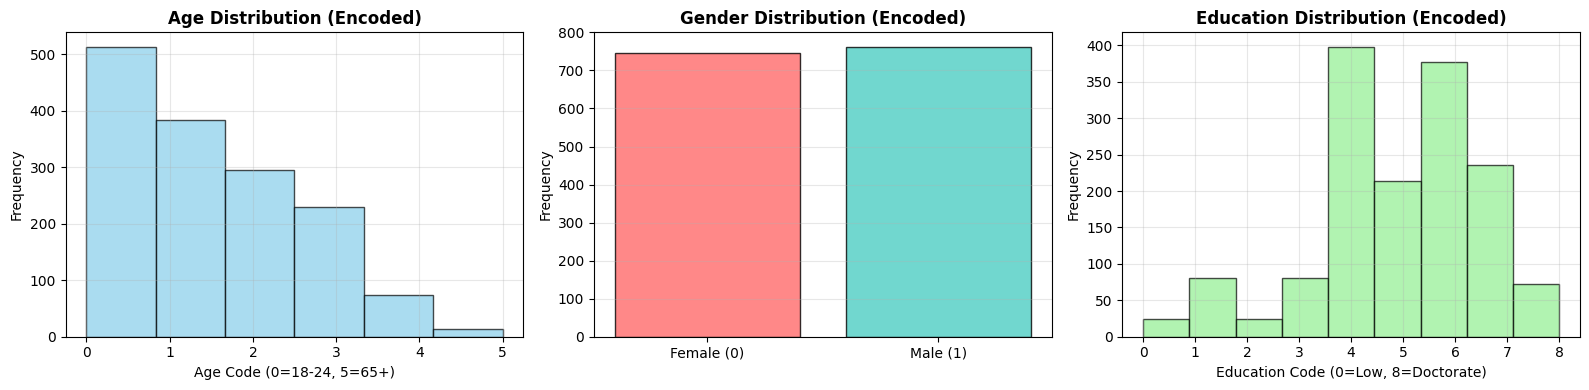

Visualization 1: Demographic features encoded


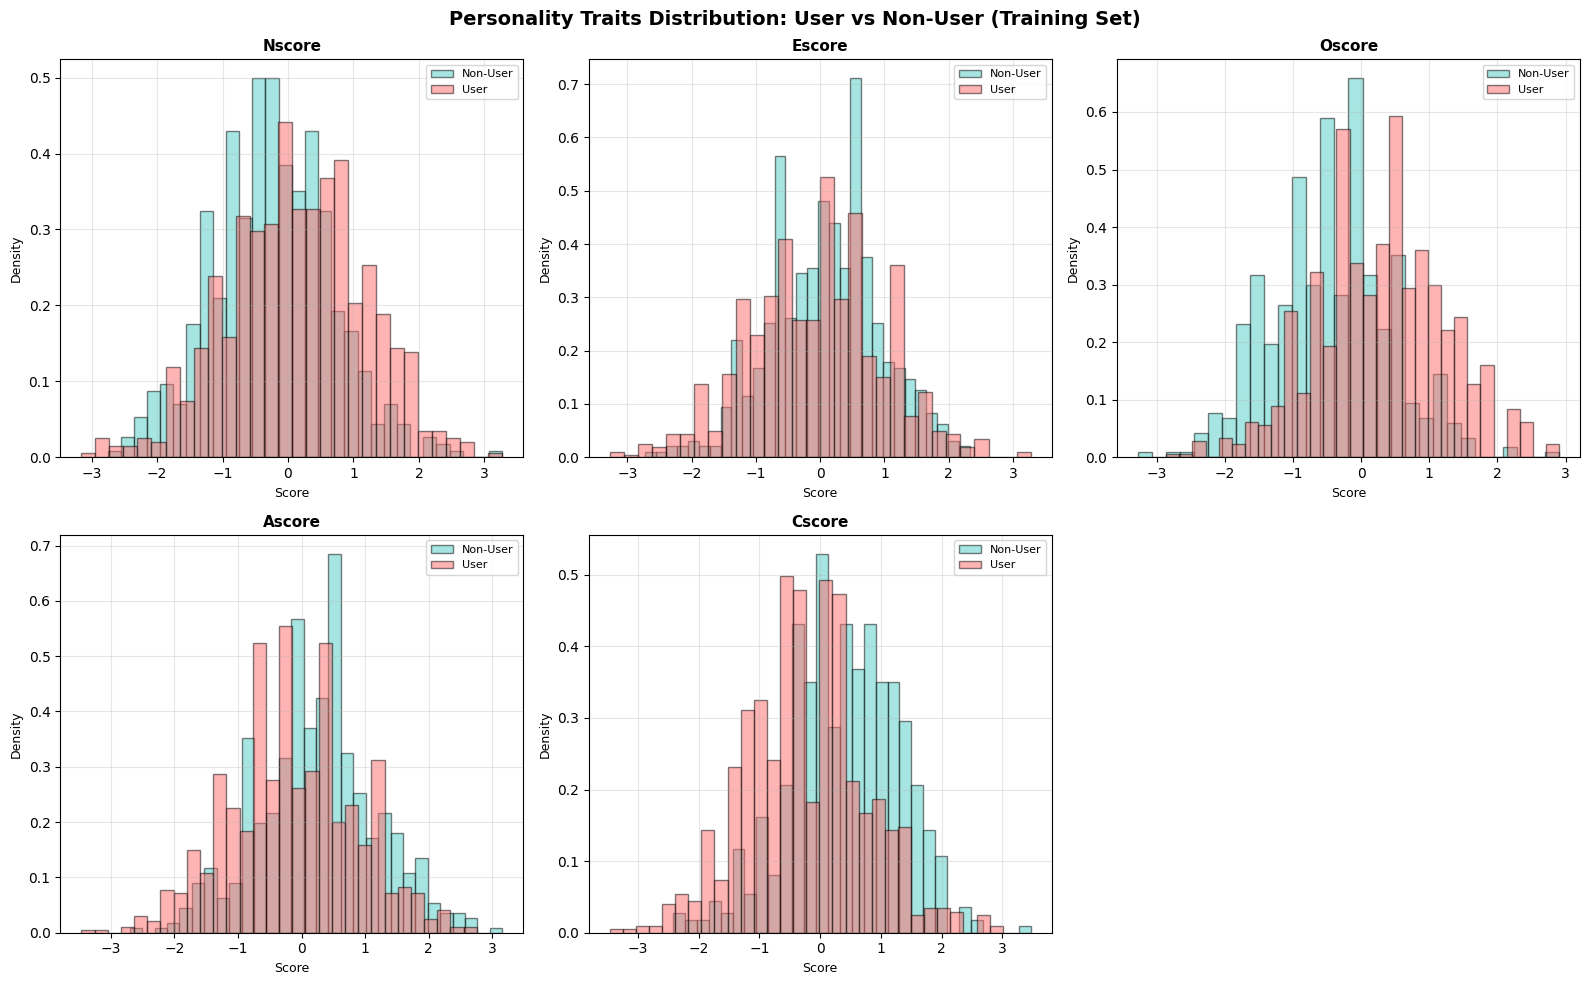

Visualization 2: Personality distributions by class


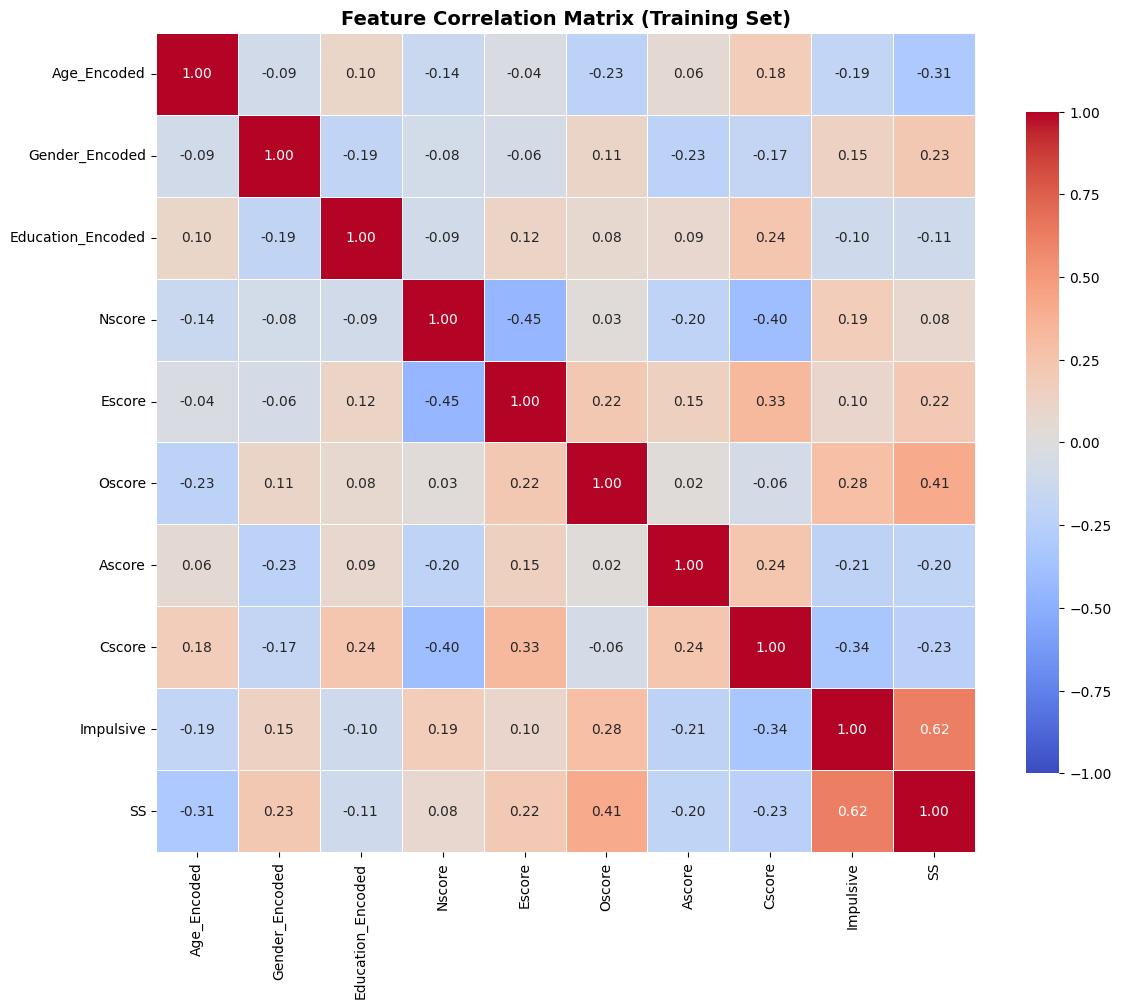

Visualization 3: Feature correlation matrix

All visualizations saved!


In [18]:
# ============================================================================
# CELL 15: VISUALIZE FEATURE DISTRIBUTIONS
# ============================================================================
"""
Visualisasi distribusi features untuk dokumentasi.
"""

print("\n" + "="*80)
print("VISUALIZING FEATURE DISTRIBUTIONS")
print("="*80)

# Plot 1: Demographic features distribution
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# Age
axes[0].hist(X_train['Age_Encoded'], bins=6, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Age Distribution (Encoded)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Age Code (0=18-24, 5=65+)', fontsize=10)
axes[0].set_ylabel('Frequency', fontsize=10)
axes[0].grid(alpha=0.3)

# Gender
gender_counts = X_train['Gender_Encoded'].value_counts().sort_index()
axes[1].bar(['Female (0)', 'Male (1)'], gender_counts, color=['#FF6B6B', '#4ECDC4'], 
            edgecolor='black', alpha=0.8)
axes[1].set_title('Gender Distribution (Encoded)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Frequency', fontsize=10)
axes[1].grid(axis='y', alpha=0.3)

# Education
axes[2].hist(X_train['Education_Encoded'], bins=9, color='lightgreen', edgecolor='black', alpha=0.7)
axes[2].set_title('Education Distribution (Encoded)', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Education Code (0=Low, 8=Doctorate)', fontsize=10)
axes[2].set_ylabel('Frequency', fontsize=10)
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/16_demographic_features_encoded.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization 1: Demographic features encoded")

# Plot 2: Personality traits distribution (training set)
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, trait in enumerate(personality_features):
    ax = axes[idx]
    
    # Separate by class
    user_values = X_train[y_train == 1][trait]
    nonuser_values = X_train[y_train == 0][trait]
    
    # Overlapping histograms
    ax.hist(nonuser_values, bins=30, alpha=0.5, color='#4ECDC4', 
            label='Non-User', edgecolor='black', density=True)
    ax.hist(user_values, bins=30, alpha=0.5, color='#FF6B6B', 
            label='User', edgecolor='black', density=True)
    
    ax.set_title(f'{trait}', fontsize=11, fontweight='bold')
    ax.set_xlabel('Score', fontsize=9)
    ax.set_ylabel('Density', fontsize=9)
    ax.legend(fontsize=8)
    ax.grid(alpha=0.3)

# Remove empty subplot
fig.delaxes(axes[-1])

plt.suptitle('Personality Traits Distribution: User vs Non-User (Training Set)', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../results/figures/17_personality_distributions_by_class.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization 2: Personality distributions by class")

# Plot 3: Correlation heatmap (numeric features)
plt.figure(figsize=(12, 10))

# Select subset of features for readability
features_for_heatmap = demographic_features_encoded + personality_features + behavioral_features
corr_subset = X_train[features_for_heatmap].corr()

sns.heatmap(corr_subset, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)

plt.title('Feature Correlation Matrix (Training Set)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../results/figures/18_feature_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization 3: Feature correlation matrix")

print("\nAll visualizations saved!")


In [20]:
# ============================================================================
# CELL 16: FINAL SUMMARY & NEXT STEPS
# ============================================================================
"""
Final summary dan persiapan untuk fase selanjutnya.
"""

# PERBAIKAN: Impor numpy untuk memastikan perhitungan di bawah berjalan
import numpy as np

# PERBAIKAN: 'imbalance_ratio_train' harus dihitung SEBELUM dicetak.
# Asumsikan 'y_train' (sebagai pandas Series) sudah ada dari sel sebelumnya.
try:
    counts_train = y_train.value_counts()
    if len(counts_train) < 2:
        imbalance_ratio_train = 1.0  # Hanya satu kelas, rasio 1:1
    elif counts_train.min() == 0:
        imbalance_ratio_train = np.inf # Salah satu kelas memiliki 0 sampel
    else:
        imbalance_ratio_train = counts_train.max() / counts_train.min()
except NameError:
    imbalance_ratio_train = 0.0 # Placeholder jika y_train tidak ada
    print("PERINGATAN: Variabel 'y_train' tidak ditemukan. 'imbalance_ratio_train' diatur ke 0.0.")
except Exception as e:
    imbalance_ratio_train = 0.0 # Placeholder untuk error lainnya
    print(f"PERINGATAN: Gagal menghitung 'imbalance_ratio_train': {e}")


print("\n" + "="*80)
print("NOTEBOOK 02 COMPLETED!")
print("="*80)

print("\nFEATURE ENGINEERING SUMMARY:")
print("-"*80)
print(f"   • Original dataset: {df.shape}")
print(f"   • Processed features: {len(feature_columns)}")
print(f"   • Training samples: {len(X_train)}")
print(f"   • Test samples: {len(X_test)}")
print(f"   • Binary target: {target_column}")
print(f"   • Class balance: {imbalance_ratio_train:.2f}:1") # Baris ini sekarang aman

print("\nFILES GENERATED:")
print("-"*80)
print("   1. Training sets:")
print("       • data/processed/X_train.csv")
print("       • data/processed/y_train.csv")
print("\n   2. Test sets:")
print("       • data/processed/X_test.csv")
print("       • data/processed/y_test.csv")
print("\n   3. Full processed dataset:")
print("       • data/processed/drug_consumption_processed.csv")
print("\n   4. Metadata & statistics:")
print("       • results/reports/02_feature_metadata.json")
print("       • results/reports/02_feature_statistics.json")
print("\n   5. Visualizations:")
print("       • results/figures/15_train_test_split_distribution.png")
print("       • results/figures/16_demographic_features_encoded.png")
print("       • results/figures/17_personality_distributions_by_class.png")
print("       • results/figures/18_feature_correlation_matrix.png")

print("\nDATA QUALITY:")
print("-"*80)
print(f"   • Missing values: {X_train.isnull().sum().sum()} (CLEAN!)")

# PERBAIKAN: Cek infinite values hanya pada kolom numerik
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    infinite_vals = np.isinf(X_train[numeric_cols].values).sum()
    print(f"   • Infinite values: {infinite_vals} (CLEAN!)")
else:
    print(f"   • Infinite values: 0 (CLEAN!)")

print(f"   • Duplicates: {X_train.duplicated().sum()} (CLEAN!)")
print(f"   • Stratification: ✅ Verified")

print("\nNEXT STEPS:")
print("="*80)
print("\nFase 2 Complete: Feature Engineering")
print("\nFase 3: Random Forest Baseline (Notebook 03)")
print("   • Load processed datasets")
print("   • Train RF with default parameters")
print("   • Baseline evaluation")
print("   • Built-in feature importance")
print("   • Set benchmark for optimization")

print("\nFase 4: Hyperparameter Tuning (Notebook 04)")
print("   • RandomizedSearchCV (5-fold CV)")
print("   • Optimize RF hyperparameters")
print("   • Compare with baseline")

print("\nFase 5: Class Imbalance Handling (Notebook 05)")
print("   • Compare: No resampling vs SMOTE vs ADASYN vs Class weighting")
print("   • Select best strategy")

print("\n" + "="*80)
print("READY TO START MODELING!")
print("="*80)

print("\nTips for next phases:")
print("   • Baseline first (understand default performance)")
print("   • Then optimize (hyperparameter tuning)")
print("   • Finally handle imbalance (if needed)")
print("   • Always compare against baseline!")

print("\n" + "="*80)


NOTEBOOK 02 COMPLETED!

FEATURE ENGINEERING SUMMARY:
--------------------------------------------------------------------------------
   • Original dataset: (1885, 71)
   • Processed features: 24
   • Training samples: 1508
   • Test samples: 377
   • Binary target: Drug_User
   • Class balance: 1.65:1

FILES GENERATED:
--------------------------------------------------------------------------------
   1. Training sets:
       • data/processed/X_train.csv
       • data/processed/y_train.csv

   2. Test sets:
       • data/processed/X_test.csv
       • data/processed/y_test.csv

   3. Full processed dataset:
       • data/processed/drug_consumption_processed.csv

   4. Metadata & statistics:
       • results/reports/02_feature_metadata.json
       • results/reports/02_feature_statistics.json

   5. Visualizations:
       • results/figures/15_train_test_split_distribution.png
       • results/figures/16_demographic_features_encoded.png
       • results/figures/17_personality_distributio